In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyfolio as pf
import os
%load_ext zipline
%load_ext autoreload
%autoreload 2

## Dual MA

In [2]:
res = pd.read_pickle("dual_ma.pickle")

In [3]:
res.head()

,period_open,period_close,long_exposure,pnl,short_exposure,capital_used,orders,transactions,gross_leverage,positions,...,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algo_volatility,BTC,short_mavg,long_mavg
2021-08-20 20:00:00+00:00,2021-08-20 13:31:00+00:00,2021-08-20 20:00:00+00:00,0.0,0.0,0.0,0.0,[],[],0.0,[],...,0.0,0.0,0.0,0.0,1,2021-08,NaN,NaN,NaN,NaN
2021-08-23 20:00:00+00:00,2021-08-23 13:31:00+00:00,2021-08-23 20:00:00+00:00,0.0,0.0,0.0,0.0,[],[],0.0,[],...,0.0,0.0,0.0,0.0,2,2021-08,0.0,NaN,NaN,NaN
2021-08-24 20:00:00+00:00,2021-08-24 13:31:00+00:00,2021-08-24 20:00:00+00:00,0.0,0.0,0.0,0.0,[],[],0.0,[],...,0.0,0.0,0.0,0.0,3,2021-08,0.0,NaN,NaN,NaN
2021-08-25 20:00:00+00:00,2021-08-25 13:31:00+00:00,2021-08-25 20:00:00+00:00,0.0,0.0,0.0,0.0,[],[],0.0,[],...,0.0,0.0,0.0,0.0,4,2021-08,0.0,NaN,NaN,NaN
2021-08-26 20:00:00+00:00,2021-08-26 13:31:00+00:00,2021-08-26 20:00:00+00:00,0.0,0.0,0.0,0.0,[],[],0.0,[],...,0.0,0.0,0.0,0.0,5,2021-08,0.0,NaN,NaN,NaN


In [4]:
res = pd.read_pickle("bop.pickle")

In [5]:
res.head()

,period_open,period_close,ending_value,starting_cash,ending_cash,portfolio_value,longs_count,shorts_count,long_value,short_value,...,period_label,algo_volatility,benchmark_period_return,benchmark_volatility,algorithm_period_return,alpha,beta,sharpe,sortino,max_drawdown
2021-08-20 20:00:00+00:00,2021-08-20 13:31:00+00:00,2021-08-20 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2021-08,NaN,0.0,NaN,0.0,None,None,None,None,0.0
2021-08-23 20:00:00+00:00,2021-08-23 13:31:00+00:00,2021-08-23 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2021-08,0.0,0.0,0.0,0.0,None,None,None,None,0.0
2021-08-24 20:00:00+00:00,2021-08-24 13:31:00+00:00,2021-08-24 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2021-08,0.0,0.0,0.0,0.0,None,None,None,None,0.0
2021-08-25 20:00:00+00:00,2021-08-25 13:31:00+00:00,2021-08-25 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2021-08,0.0,0.0,0.0,0.0,None,None,None,None,0.0
2021-08-26 20:00:00+00:00,2021-08-26 13:31:00+00:00,2021-08-26 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2021-08,0.0,0.0,0.0,0.0,None,None,None,None,0.0


In [6]:
res.tail()

,period_open,period_close,ending_value,starting_cash,ending_cash,portfolio_value,longs_count,shorts_count,long_value,short_value,...,period_label,algo_volatility,benchmark_period_return,benchmark_volatility,algorithm_period_return,alpha,beta,sharpe,sortino,max_drawdown
2022-08-15 20:00:00+00:00,2022-08-15 13:31:00+00:00,2022-08-15 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2022-08,0.0,0.0,0.0,0.0,None,None,None,None,0.0
2022-08-16 20:00:00+00:00,2022-08-16 13:31:00+00:00,2022-08-16 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2022-08,0.0,0.0,0.0,0.0,None,None,None,None,0.0
2022-08-17 20:00:00+00:00,2022-08-17 13:31:00+00:00,2022-08-17 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2022-08,0.0,0.0,0.0,0.0,None,None,None,None,0.0
2022-08-18 20:00:00+00:00,2022-08-18 13:31:00+00:00,2022-08-18 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2022-08,0.0,0.0,0.0,0.0,None,None,None,None,0.0
2022-08-19 20:00:00+00:00,2022-08-19 13:31:00+00:00,2022-08-19 20:00:00+00:00,0.0,10000000.0,10000000.0,10000000.0,0,0,0.0,0.0,...,2022-08,0.0,0.0,0.0,0.0,None,None,None,None,0.0


### Buy and Hold

In [7]:
res = pd.read_pickle("bnh.pickle")

<AxesSubplot:>

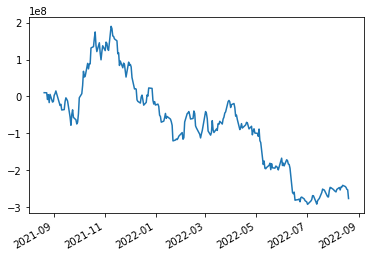

In [8]:
res.portfolio_value.plot()

### Simple MA

In [9]:
res = pd.read_pickle("sma.pickle")

<AxesSubplot:>

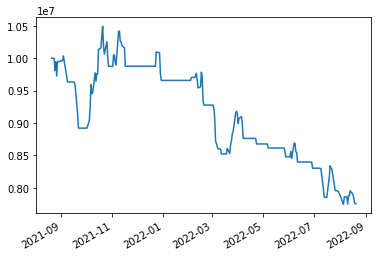

In [10]:
res.portfolio_value.plot()

## MACD

In [21]:
res = pd.read_pickle("macd.pickle")

In [22]:
res.head()

,period_open,period_close,net_leverage,starting_exposure,returns,ending_exposure,starting_value,ending_value,starting_cash,ending_cash,...,treasury_period_return,trading_days,period_label,algo_volatility,benchmark_period_return,benchmark_volatility,macd,macdsignal,macdhist,price
2021-08-20 20:00:00+00:00,2021-08-20 13:31:00+00:00,2021-08-20 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,0.0,1,2021-08,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2021-08-23 20:00:00+00:00,2021-08-23 13:31:00+00:00,2021-08-23 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,0.0,2,2021-08,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-08-24 20:00:00+00:00,2021-08-24 13:31:00+00:00,2021-08-24 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,0.0,3,2021-08,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-08-25 20:00:00+00:00,2021-08-25 13:31:00+00:00,2021-08-25 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,0.0,4,2021-08,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2021-08-26 20:00:00+00:00,2021-08-26 13:31:00+00:00,2021-08-26 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0,...,0.0,5,2021-08,0.0,0.0,0.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

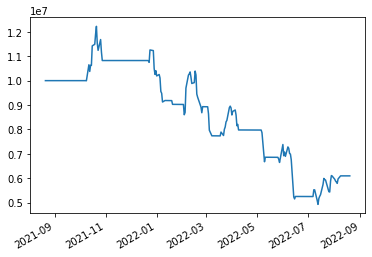

In [23]:
res.portfolio_value.plot()